Accuracy: 96.49%
Confusion Matrix:
 [[45  2]
 [ 2 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



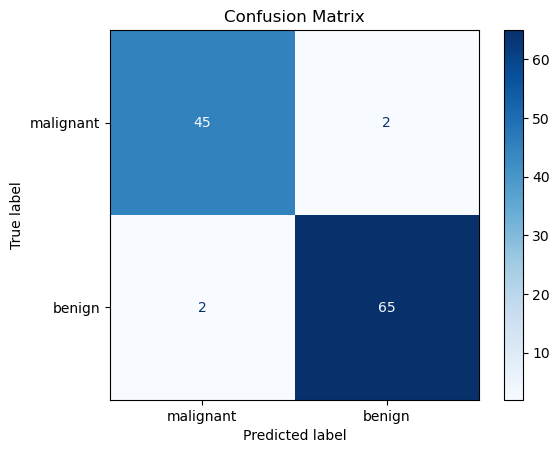

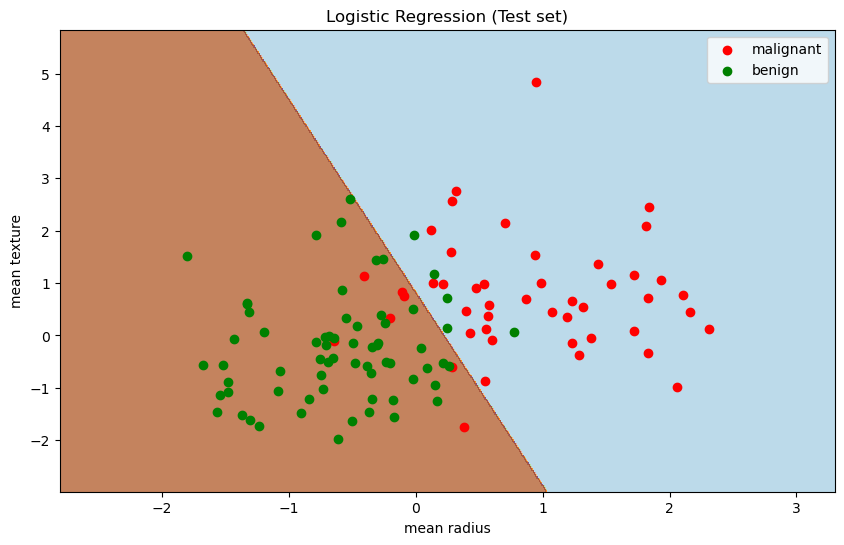

In [1]:
# Logistic Regression on Breast Cancer Dataset

# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Importing the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Creating a DataFrame for easy manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the training set
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting results for the first two features (for visualization purposes)
# You can choose any pair of features, here we take the first two for simplicity
plt.figure(figsize=(10, 6))
X_set, y_set = X_test[:, :2], y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Use only the first two features for scaling and prediction
sc_2_features = StandardScaler()
X_train_2_features = sc_2_features.fit_transform(X_train[:, :2])
X_test_2_features = sc_2_features.transform(X_test[:, :2])

# Train a new Logistic Regression model using only the first two features
classifier_2_features = LogisticRegression(max_iter=1000)
classifier_2_features.fit(X_train_2_features, y_train)

plt.contourf(X1, X2, classifier_2_features.predict(sc_2_features.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=plt.cm.Paired)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green'][i], label=data.target_names[j])
plt.title('Logistic Regression (Test set)')
plt.xlabel(data.feature_names[0])  # First feature
plt.ylabel(data.feature_names[1])  # Second feature
plt.legend()
plt.show()
